In [10]:
from keras.models import Model, Input
from keras.layers import Dense
from keras.datasets import mnist, cifar10
from keras import losses
import matplotlib.pyplot as plt

In [11]:
(x_train, _), (x_test, _) = cifar10.load_data()
#x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]).astype("float32")
#x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]).astype("float32")
#x_train /= x_train.max()
#x_test /= x_test.max()

170500096/170498071 [==============================] - 54s 0us/step


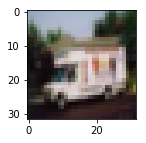

In [33]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[1213])

In [71]:
input1 = Input((784,))

In [104]:
x = Dense(1000, activation="relu")(input1)
x = Dense(64, activation="relu")(x)
#x = Dense(16, activation="relu")(x)
x = Dense(32, activation="relu")(x)
x = Dense(1000, activation="relu")(x)
x = Dense(784, activation="softmax")(x)

In [105]:
model = Model(input1, x)
model.compile("adam", loss=losses.binary_crossentropy, metrics=['accuracy'])

In [106]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_54 (Dense)             (None, 64)                64064     
_________________________________________________________________
dense_55 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_56 (Dense)             (None, 1000)              33000     
_________________________________________________________________
dense_57 (Dense)             (None, 784)               784784    
Total params: 1,668,928
Trainable params: 1,668,928
Non-trainable params: 0
_________________________________________________________________


In [107]:
model.fit(x_train, x_train, batch_size=128, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 208us/step - loss: 0.6974 - acc: 0.8087 - val_loss: 0.6684 - val_acc: 0.8093
Epoch 2/10
48000/48000 [==============================] - 8s 161us/step - loss: 0.6696 - acc: 0.8087 - val_loss: 0.6604 - val_acc: 0.8093
Epoch 3/10
48000/48000 [==============================] - 8s 160us/step - loss: 0.6642 - acc: 0.8087 - val_loss: 0.6567 - val_acc: 0.8093
Epoch 4/10
48000/48000 [==============================] - 8s 160us/step - loss: 0.6613 - acc: 0.8087 - val_loss: 0.6545 - val_acc: 0.8093
Epoch 5/10
48000/48000 [==============================] - 8s 160us/step - loss: 0.6593 - acc: 0.8087 - val_loss: 0.6529 - val_acc: 0.8093
Epoch 6/10
48000/48000 [==============================] - 8s 160us/step - loss: 0.6578 - acc: 0.8087 - val_loss: 0.6517 - val_acc: 0.8093
Epoch 7/10
48000/48000 [==============================] - 8s 160us/step - loss: 0.6566 - acc: 0.8087 - val_loss: 0.6507 -

In [108]:
pred = model.predict(x_test).reshape(x_test.shape[0], 28, 28)
test = x_test.reshape(x_test.shape[0], 28, 28)

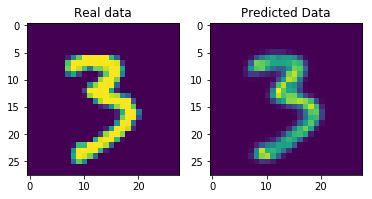

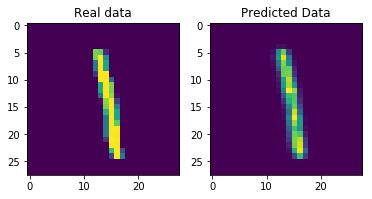

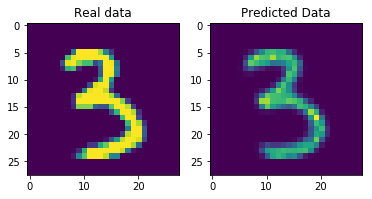

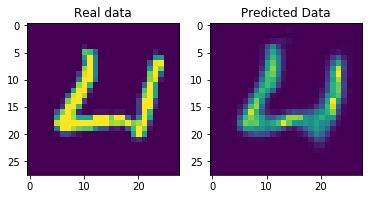

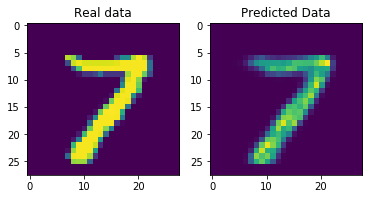

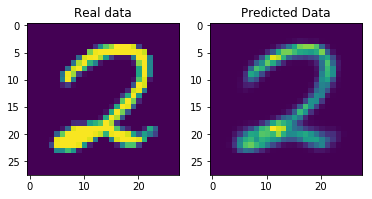

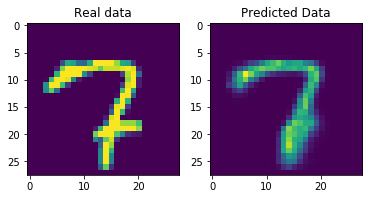

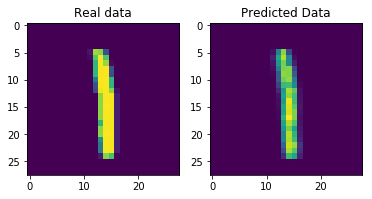

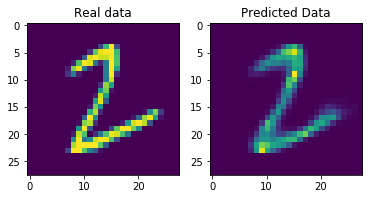

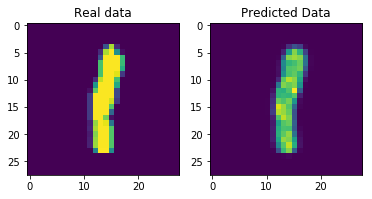

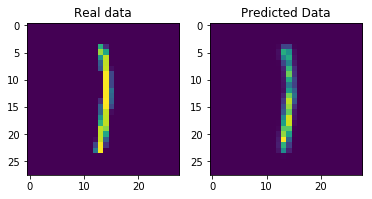

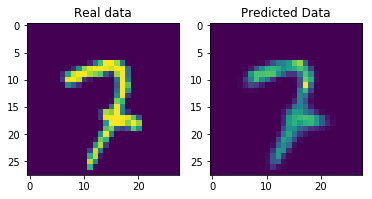

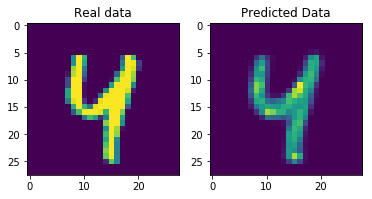

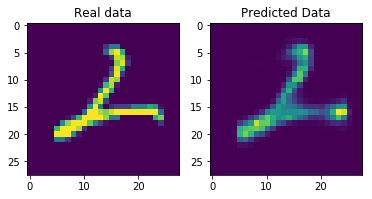

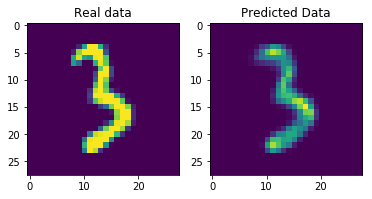

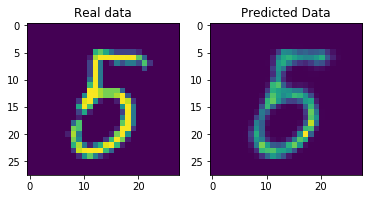

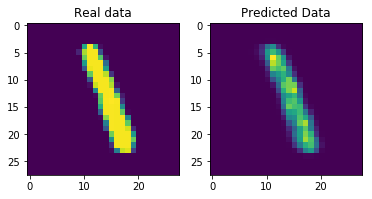

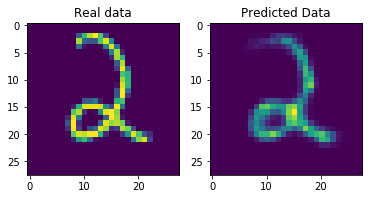

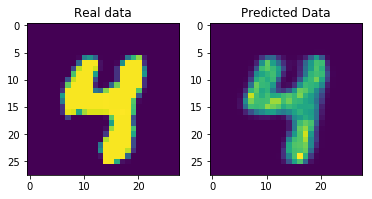

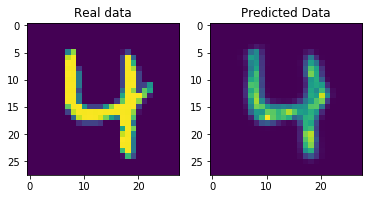

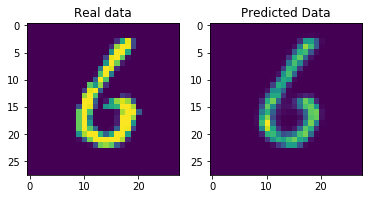

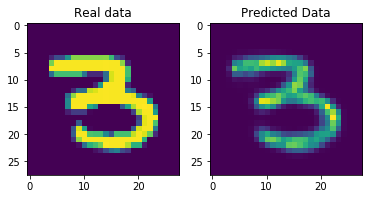

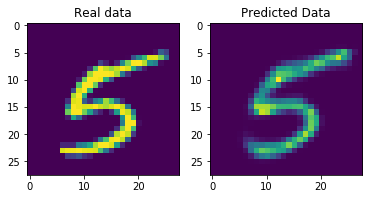

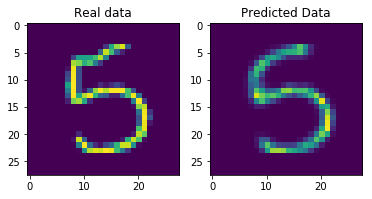

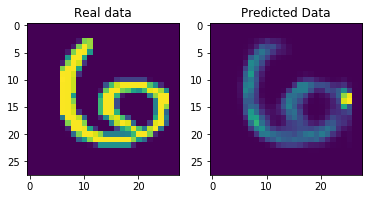

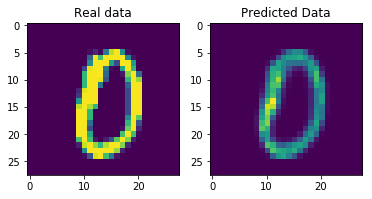

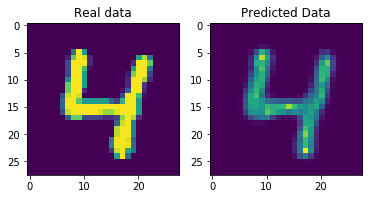

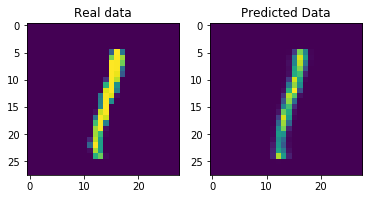

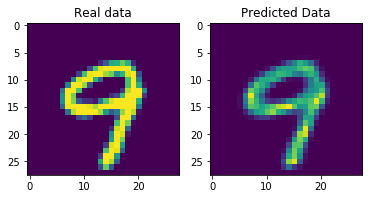

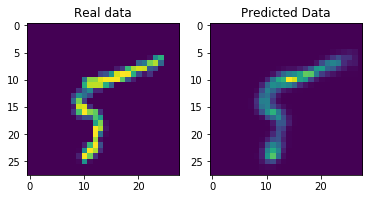

In [109]:
for i in range(30, 60):
    num = i
    plt.subplot(1,2,1)
    plt.title("Real data")
    plt.imshow(test[num])
    plt.subplot(1,2,2)
    plt.title("Predicted Data")
    plt.imshow(pred[num])
    plt.show()